<img src="https://drive.google.com/uc?export=view&id=1wYSMgJtARFdvTt5g7E20mE4NmwUFUuog" width="200">

[![Build Fast with AI](https://img.shields.io/badge/BuildFastWithAI-GenAI%20Bootcamp-blue?style=for-the-badge&logo=artificial-intelligence)](https://www.buildfastwithai.com/genai-course)
[![EduChain GitHub](https://img.shields.io/github/stars/satvik314/educhain?style=for-the-badge&logo=github&color=gold)](https://github.com/satvik314/educhain)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/16l7CESlgpdhtfmL7z0KKe06RpfhPhFUE?usp=sharing)
## Master Generative AI in 6 Weeks
**What You'll Learn:**
- Build with Latest LLMs
- Create Custom AI Apps
- Learn from Industry Experts
- Join Innovation Community
Transform your AI ideas into reality through hands-on projects and expert mentorship.
[Start Your Journey](https://www.buildfastwithai.com/genai-course)
*Empowering the Next Generation of AI Innovators

# 📝 GPTCache: High-Speed Caching for Generative AI  

GPTCache is an **AI caching library** designed to **accelerate Generative AI applications** by storing and reusing previous responses. It optimizes **latency, cost, and performance** for LLM-based workflows.  

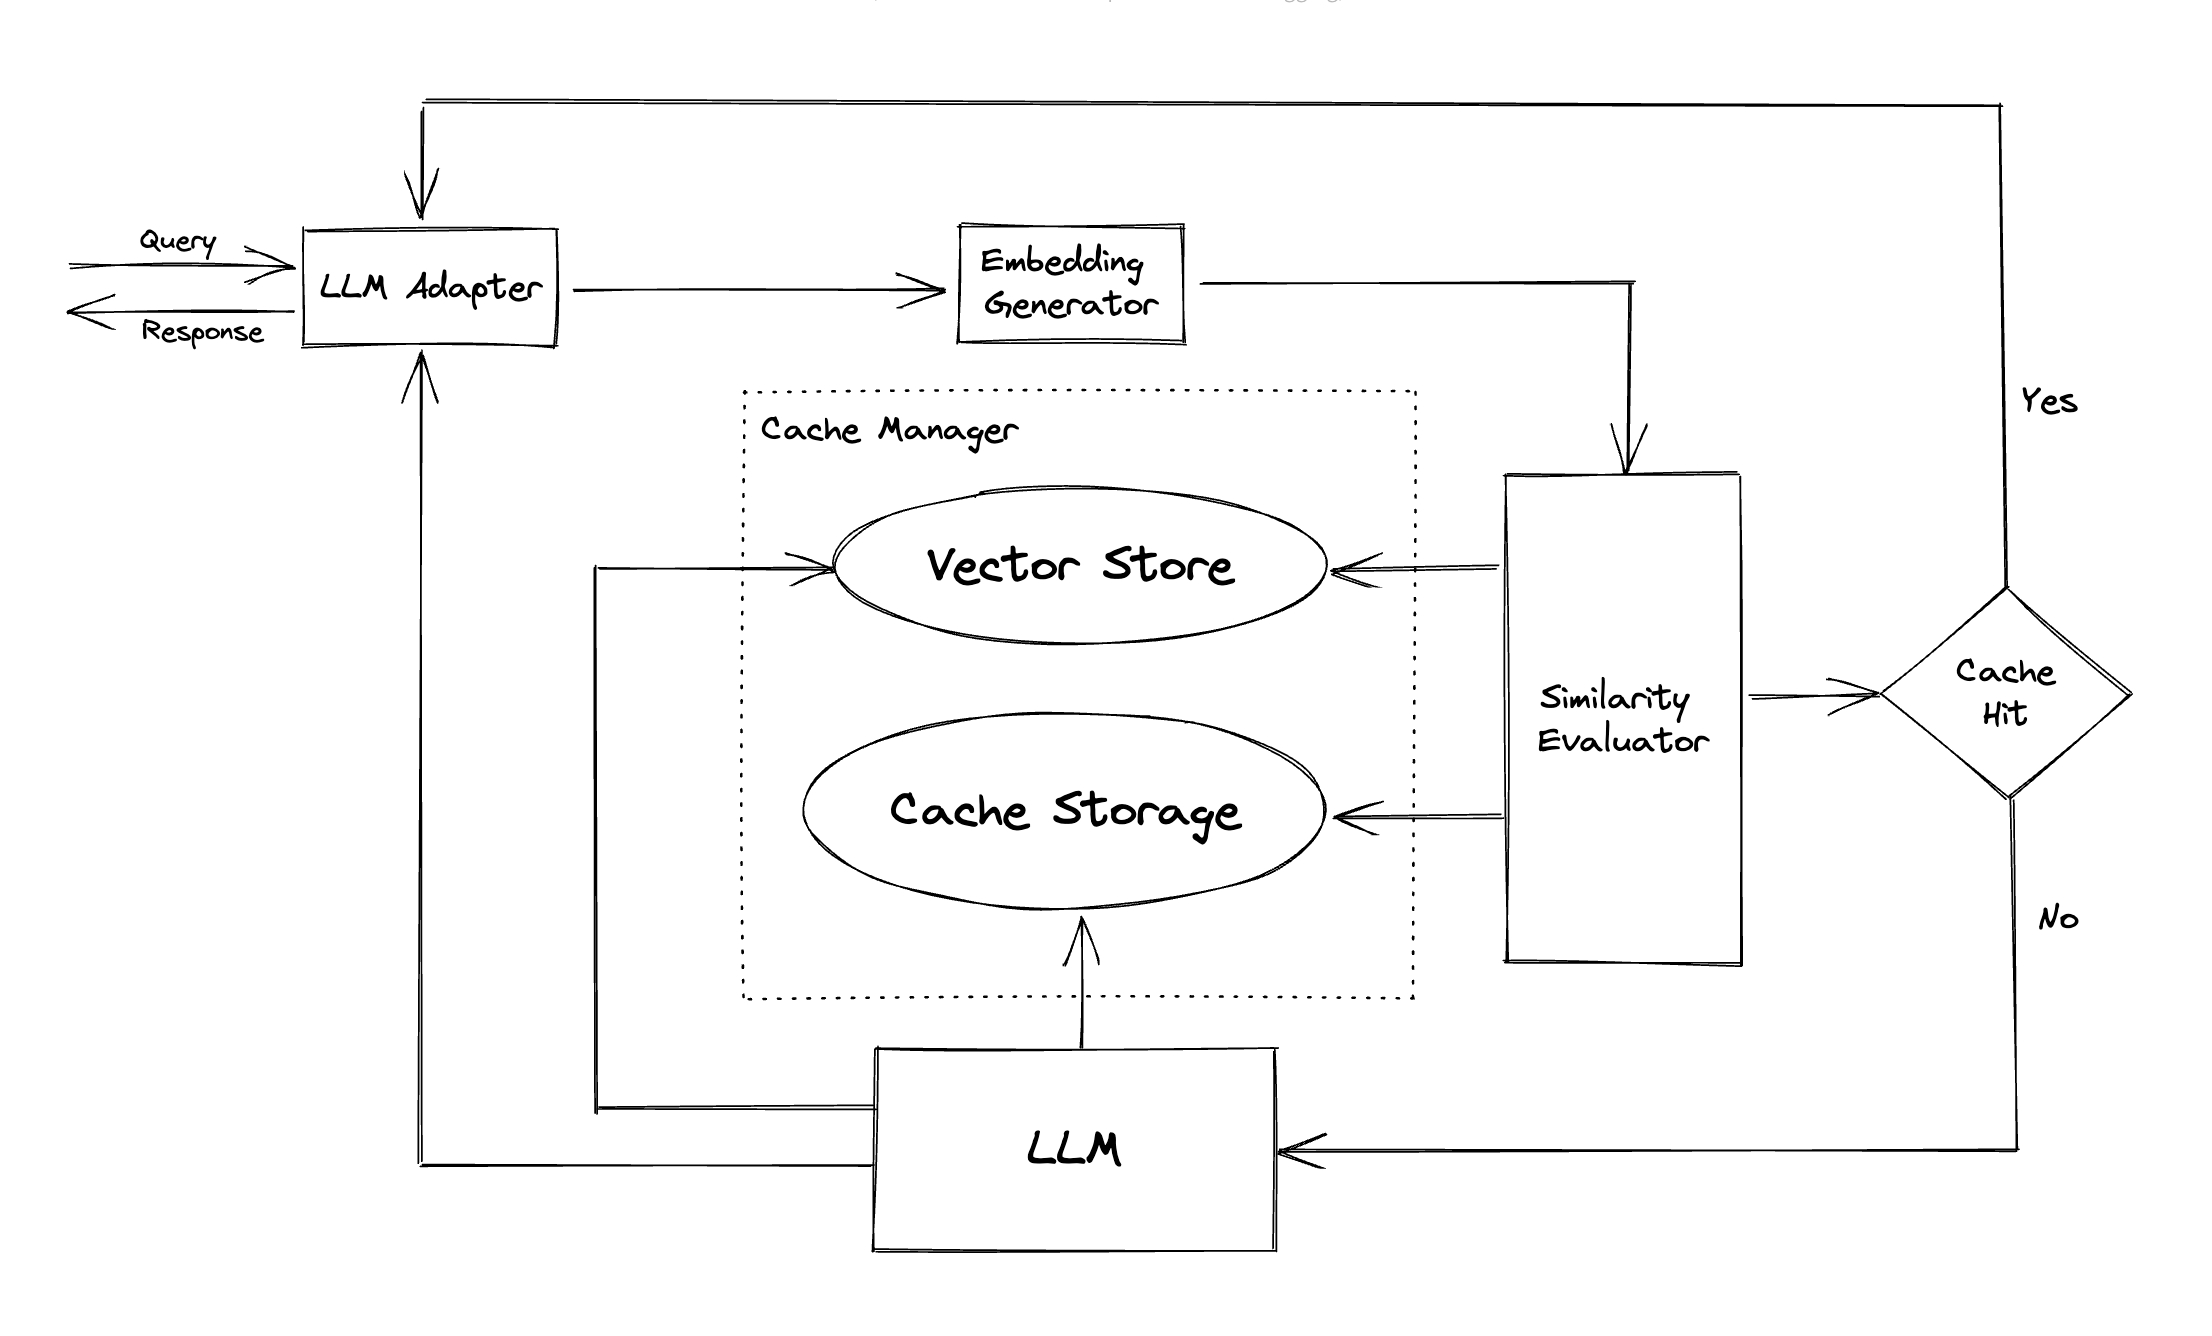

## ⚡ Key Features:  

🚀 **Ultra-Fast Response Times**  
   - Reduces redundant API calls by caching responses, leading to **near-instant inference** for repeated queries.  

🔍 **Intelligent Query Matching**  
   - Supports both **exact match** and **semantic caching**, enabling faster retrieval based on query similarity.  

💾 **Flexible Storage Options**  
   - Provides **customizable storage** with efficient indexing for managing cached AI responses.  

⚙️ **Seamless AI Integration**  
   - Works effortlessly with **LLMs, chatbots, and retrieval-based AI applications** to enhance performance.  

📈 **Optimized for Cost & Efficiency**  
   - Reduces API costs by **minimizing redundant requests**, making AI applications **more scalable and cost-effective**.  

🔗 **Customizable & Extendable**  
   - Offers **adaptive caching policies, expiration rules, and query handling** for different AI workloads.  

GPTCache enhances **chatbots, RAG systems, and AI-driven applications**, delivering **faster response times** and **efficient AI interactions**. 🚀

###**Setup and Installation**

In [ ]:
pip install gptcache onnxruntime openai==0.28 tiktoken

In [ ]:
import os
from google.colab import userdata

OPENAI_API_KEY=userdata.get('OPENAI_API_KEY')
os.environ['OPENAI_API_KEY']=OPENAI_API_KEY

### 🚀 **OpenAI API Original Usage**








In [ ]:
import os
import time

import openai
from google.colab import userdata

def response_text(openai_resp):
    return openai_resp['choices'][0]['message']['content']


question = 'what‘s chatgpt'

openai.api_key = OPENAI_API_KEY
start_time = time.time()
response = openai.ChatCompletion.create(
  model='gpt-4o',
  messages=[
    {
        'role': 'user',
        'content': question
    }
  ],
)
print(f'Question: {question}')
print("Time consuming: {:.2f}s".format(time.time() - start_time))
print(f'Answer: {response_text(response)}\n')

Question: what‘s chatgpt
Time consuming: 0.87s
Answer: ChatGPT is a chatbot developed by OpenAI that uses a large language model to generate human-like responses in conversations with users. It uses advanced natural language processing techniques to understand and respond to text input in a way that simulates a conversation with a human. ChatGPT can be used for a variety of purposes, such as customer service, virtual assistance, language learning, and more.



### ⚡ **OpenAI API + GPTCache: Exact Match Cache**


In [ ]:
import time


def response_text(openai_resp):
    return openai_resp['choices'][0]['message']['content']

### ⚡ **GPTCache Initialization**

In [ ]:
from gptcache import cache
from gptcache.adapter import openai

cache.init()
cache.set_openai_key()


print("Cache loading.....")


Cache loading.....


### ⚡ **GPTCache: Query Timing**








In [ ]:
question = "what's github"
for _ in range(2):
    start_time = time.time()
    response = openai.ChatCompletion.create(
      model='gpt-4o',
      messages=[
        {
            'role': 'user',
            'content': question
        }
      ],
    )
    print(f'Question: {question}')
    print("Time consuming: {:.2f}s".format(time.time() - start_time))
    print(f'Answer: {response_text(response)}\n')

Question: what's github
Time consuming: 0.84s
Answer: GitHub is a web-based platform used for hosting and collaborating on software development projects. It provides a way for developers to store, manage, and track changes to their code, as well as to work together with others on the same project. In addition to version control, GitHub also offers various project management features, issue tracking, and a platform for code review and collaboration. It is widely used in the software development community for open source and private projects alike.

Question: what's github
Time consuming: 0.76s
Answer: GitHub is a web-based platform used for hosting and collaborating on software development projects. It provides a way for developers to store, manage, and track changes to their code, as well as to work together with others on the same project. In addition to version control, GitHub also offers various project management features, issue tracking, and a platform for code review and collabor

### 🔍 **OpenAI API + GPTCache: Similar Search Cache**








In [ ]:
import time


def response_text(openai_resp):
    return openai_resp['choices'][0]['message']['content']

from gptcache import cache
from gptcache.adapter import openai
from gptcache.embedding import Onnx
from gptcache.manager import CacheBase, VectorBase, get_data_manager
from gptcache.similarity_evaluation.distance import SearchDistanceEvaluation

print("Cache loading.....")

Cache loading.....


### ⚙️ **ONNX + FAISS Integration**

In [ ]:
onnx = Onnx()
data_manager = get_data_manager(CacheBase("sqlite"), VectorBase("faiss", dimension=onnx.dimension))
cache.init(
    embedding_func=onnx.to_embeddings,
    data_manager=data_manager,
    similarity_evaluation=SearchDistanceEvaluation(),
    )
cache.set_openai_key()

### 🔍 **Similar Questions for Caching**


In [ ]:
questions = [
    "what's github",
    "can you explain what GitHub is",
    "can you tell me more about GitHub",
    "what is the purpose of GitHub"
]


### ⏳ **Processing Similar Questions**








In [ ]:

for question in questions:
    start_time = time.time()
    response = openai.ChatCompletion.create(
        model='gpt-4o',
        messages=[
            {
                'role': 'user',
                'content': question
            }
        ],
    )
    print(f'Question: {question}')
    print("Time consuming: {:.2f}s".format(time.time() - start_time))
    print(f'Answer: {response_text(response)}\n')

Question: what's github
Time consuming: 3.47s
Answer: GitHub is a web-based platform used for hosting and managing code repositories. It is commonly used by developers to collaboratively work on and share code, track changes, and manage project version control. GitHub provides features like issue tracking, code review, continuous integration, and collaboration tools to streamline the software development process. It is widely used in the software development community for open source projects, as well as by companies and organizations for proprietary projects.

Question: can you explain what GitHub is
Time consuming: 2.10s
Answer: GitHub is a web-based platform used for hosting and managing code repositories. It is commonly used by developers to collaboratively work on and share code, track changes, and manage project version control. GitHub provides features like issue tracking, code review, continuous integration, and collaboration tools to streamline the software development process

###**OpenAI API + GPTCache, use temperature**


In [ ]:
import time

from gptcache import cache, Config
from gptcache.manager import manager_factory
from gptcache.embedding import Onnx
from gptcache.processor.post import temperature_softmax
from gptcache.similarity_evaluation.distance import SearchDistanceEvaluation
from gptcache.adapter import openai

cache.set_openai_key()

onnx = Onnx()
data_manager = manager_factory("sqlite,faiss", vector_params={"dimension": onnx.dimension})

cache.init(
    embedding_func=onnx.to_embeddings,
    data_manager=data_manager,
    similarity_evaluation=SearchDistanceEvaluation(),
    post_process_messages_func=temperature_softmax
    )

question = "what's github"

for _ in range(3):
    start = time.time()
    response = openai.ChatCompletion.create(
        model="gpt-4",
        temperature = 1.0,
        messages=[{
            "role": "user",
            "content": question
        }],
    )
    print("Time elapsed:", round(time.time() - start, 3))
    print("Answer:", response["choices"][0]["message"]["content"])

Time elapsed: 1.911
Answer: GitHub is a web-based platform used for version control and collaboration on software development projects. It allows developers to store and manage their code repositories, track changes made to the code, and collaborate with others on software development projects. GitHub also provides project management tools, issue tracking, and a platform for hosting documentation and websites.
Time elapsed: 0.914
Answer: GitHub is a web-based platform used for version control and collaboration on software development projects. It allows developers to store and manage their code repositories, track changes made to the code, and collaborate with others on software development projects. GitHub also provides project management tools, issue tracking, and a platform for hosting documentation and websites.
Time elapsed: 0.867
Answer: GitHub is a web-based platform used for version control and collaboration on software development projects. It allows developers to store and ma

### ✅ **Exact Match Caching**








In [ ]:
from gptcache.adapter import openai
from gptcache import cache
from gptcache.similarity_evaluation.exact_match import ExactMatchEvaluation


def run():
    cache.init(similarity_evaluation=ExactMatchEvaluation())
    cache.set_openai_key()

    answer = openai.ChatCompletion.create(
        model='gpt-3.5-turbo',
        messages=[
            {'role': 'user', 'content': 'what is chatgpt'}
        ],
    )
    print(answer)


if __name__ == '__main__':
    run()

{
  "id": "chatcmpl-B16oIzwiU60Ek8V5xHeb18hXhiIVV",
  "object": "chat.completion",
  "created": 1739604206,
  "model": "gpt-3.5-turbo-0125",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "ChatGPT is an AI model developed by OpenAI that specializes in generating human-like text responses in natural language. It uses a combination of machine learning techniques, including deep learning and natural language processing, to understand and generate text-based conversations with users. ChatGPT is often used in chatbots, customer service applications, virtual assistants, and other conversational AI systems to interact with users in a more personalized and natural way.",
        "refusal": null
      },
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 12,
    "completion_tokens": 86,
    "total_tokens": 98,
    "prompt_tokens_details": {
      "cached_tokens": 0,
      "audio_tokens": 0